In [2]:
import os,csv,json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns

In [4]:
# import csv
csv_file_name = "/home/emilyjanedennis/scratch/z267/lightsheet/3dunet_output/pooled_cell_measures/z267_cell_measures.csv"
fulldf = pd.read_csv(csv_file_name)


In [5]:
fulldf = fulldf.apply(pd.to_numeric, errors='coerce')
fulldf.keys()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'intensity', 'maximum perimeter',
       'no_voxels', 'sphericity', 'val', 'x', 'y', 'z', 'z depth'],
      dtype='object')

In [6]:
df = fulldf[fulldf["z depth"] > 2]
df = df[df["no_voxels"] > 2]
df = df[df["maximum perimeter"] > 1]
df = df[df["intensity"]>0.7]

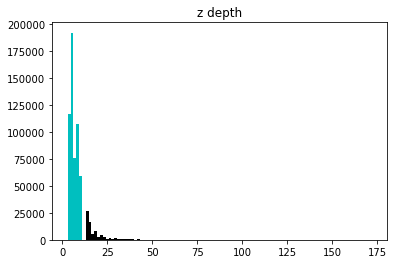

In [8]:
zlim = 12

zdepth = df['z depth']
goodzdepth = zdepth[zdepth < zlim]
badzdepth = zdepth[zdepth > zlim]
plt.figure()
# we are imaging at ~10 micron, expect soma < 150mm2 (generously, also allows for clumps of cells)
#plt.hist([goodzdepth, badzdepth], bins=50)

plt.hist(goodzdepth, bins=5, facecolor='c')
plt.hist(badzdepth, bins=100, facecolor='k')
plt.title('z depth')
plt.show()

In [9]:
slim=0.4

sphericity = pd.to_numeric(df['sphericity'])

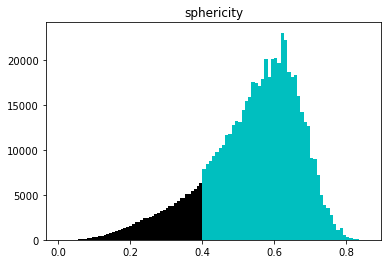

In [12]:
goodsphericity = sphericity[sphericity > slim]
badsphericity = sphericity[sphericity < slim]
# we are imaging at ~10 micron, expect soma < 100mm2 (generously, also allows for clumps of cells)
plt.figure
plt.hist(goodsphericity,bins=50, facecolor='c')
plt.hist(badsphericity,bins=50, facecolor='k')
plt.title('sphericity')
plt.show()

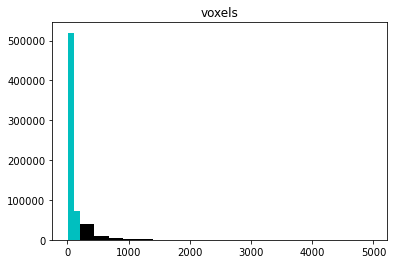

In [14]:
vlim = 200

vox = df['no_voxels']
realvox = vox[vox < 5000]
badvox = realvox[realvox > vlim]
plt.figure()
plt.hist(realvox,bins=50, facecolor='c')
plt.hist(badvox,bins=20, facecolor='k')
plt.title('voxels')
plt.show()


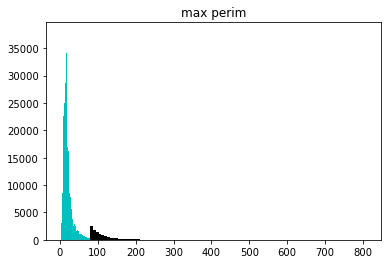

In [18]:
mplim = 80

mp = pd.to_numeric(df['maximum perimeter'])
goodmp = mp[mp < mplim]
badmp = mp[mp > mplim]
plt.figure()
plt.hist(goodmp,bins=100, facecolor='c')
plt.hist(badmp,bins=100, facecolor='k')
plt.title('max perim')
plt.show()

In [19]:
singlezplane = df[df.z < 200]
singlezplane = singlezplane[singlezplane.z > 148]
singlezplane.columns


Index(['Unnamed: 0', 'Unnamed: 0.1', 'intensity', 'maximum perimeter',
       'no_voxels', 'sphericity', 'val', 'x', 'y', 'z', 'z depth'],
      dtype='object')

In [20]:
max(df.z)

458

In [21]:
singlezplane.columns = ['num1', 'num2','intensity', 'maximum_perimeter', 'no_voxels', 'sphericity', 'val', 'x', 'y', 'z', 'z_depth']

singlez_z = singlezplane[singlezplane.z_depth > zlim]
singlez_v = singlez_z[singlez_z.no_voxels > vlim]
singlez_mp = singlez_v[singlez_v.maximum_perimeter > mplim]
singlez_s = singlez_mp[singlez_mp.sphericity < slim]

sub = singlezplane[singlezplane.z_depth < zlim]
sub = sub[sub.no_voxels < vlim]
sub = sub[sub.maximum_perimeter < mplim]
sub = sub[sub.sphericity > slim]
print(zlim,)

<function matplotlib.pyplot.show(*args, **kw)>

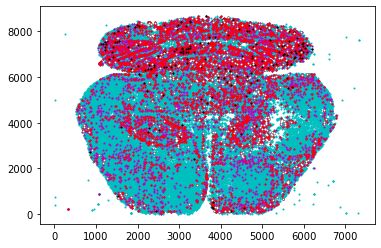

In [22]:
plt.figure
plt.scatter(singlezplane.x,singlezplane.y,s=1,facecolor='c')
plt.scatter(singlez_z.x,singlez_z.y,s=1,facecolor='m')
plt.scatter(singlez_v.x,singlez_v.y,s=1,facecolor='r')
plt.scatter(singlez_mp.x,singlez_mp.y,s=1,facecolor='k')
plt.scatter(singlez_s.x,singlez_s.y,s=1,facecolor='w')
plt.show

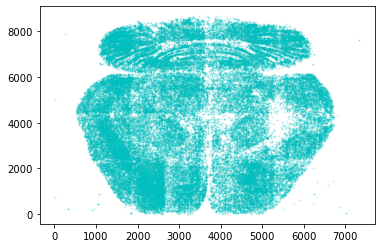

In [24]:
plt.scatter(sub.x,sub.y,s=1,facecolor='c',alpha=0.2)

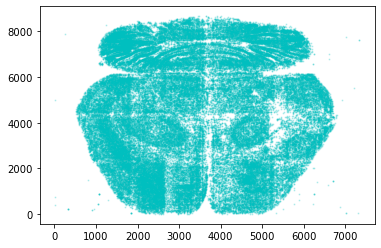

In [26]:
plt.scatter(singlezplane.x,singlezplane.y,s=1,facecolor='c',alpha=0.2)

In [88]:
# add mask 2447x2900

In [89]:
import SimpleITK as sitk

In [90]:
# need to have points in mri space so need to transformix points
# which means I need to get points into a transformix-readable format first
# then warp to MRI - try to keep id of points intact
    # this would allow further processing (like slicing by z pln, etc)
    # without additional warp steps
# then use the transformed points + mask/segmentations
# this could probably all be done in ng as well

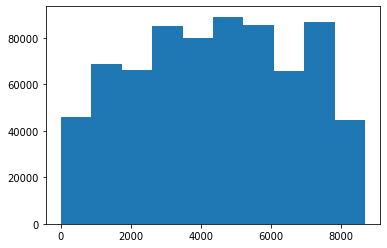

In [91]:
subdf = fulldf[['z','y','x']]
npdf = subdf.to_numpy()
plt.hist(npdf[:,1])
plt.show()

In [92]:
np.save("/home/emilyjanedennis/Desktop/z267npdf.npy",npdf)

In [93]:
sys.path.append("/home/emilyjanedennis/Desktop/GitHub/rat_BrainPipe/")

from tools.analysis.transform_points import transform_points

transformfiles=["/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/output_dirs/MRIr_to_z267/TransformParameters.0.txt",
               "/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/output_dirs/MRIr_to_z267/TransformParameters.1.txt",
               "/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/output_dirs/MRIr_to_z267/TransformParameters.2.txt",
               "/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/output_dirs/MRIr_to_z267/TransformParameters.3.txt"]

# optional resampling between fullsized and input to elastix
original_dims = (7341, 8701, 606)  # sagittal
resample_dims = (591, 1006, 392)  # sagittal
resample_points = [original_dims, resample_dims]
resample_points

[(7341, 8701, 606), (591, 1006, 392)]

In [94]:
transform_points("/home/emilyjanedennis/Desktop/z267npdf.npy","/home/emilyjanedennis/Desktop/",transformfiles,resample_points)

This function assumes ZYX centers...
writing centers to transfomix input points text file......done writing centers

***********Starting Transformix***********b'\ntransformix is started at Wed Oct  7 10:24:23 2020.\n\nwhich transformix:   transformix\ntransformix runs at: emilyjanedennis-System-Product-Name\n  Linux 5.4.0-48-generic (x64), #52-Ubuntu SMP Thu Sep 10 10:58:49 UTC 2020\n  with 128513 MB memory, and 10 cores @ 3809 MHz.\nRunning transformix with parameter file "/home/emilyjanedennis/Desktop/order3_TransformParameters.3.txt".\n\nReading the elastix parameters from file ...\n\nInstalling all components.\nInstallingComponents was successful.\n\nELASTIX version: 5.000\nCommand line options from ElastixBase:\n-in       unspecified, so no input image specified\n-out      /home/emilyjanedennis/Desktop/\n-threads  unspecified, so all available threads are used\n-tp       /home/emilyjanedennis/Desktop/order3_TransformParameters.3.txt\n-def      /home/emilyjanedennis/Desktop/zyx_poi

In [95]:
transformed = np.load("/home/emilyjanedennis/Desktop/posttransformed_zyx_voxels.npy")

In [96]:
import tifffile as tif

annotation_volume_filename = "/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/tiffs/SIGMA_annotation_90um_edge_90um_vent_erosion.tif" 
annotation_volume=tif.imread(annotation_volume_filename)
annotation_labels = "/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/labels/SIGMA_labels.csv"
labels = pd.read_csv(annotation_labels)

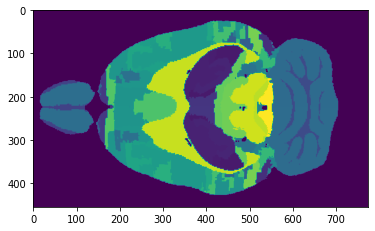

In [97]:

plt.imshow(annotation_volume[:,:,100])
plt.show()

In [98]:
np.shape(annotation_volume)

(455, 774, 302)

In [99]:
resample_dims

(591, 1006, 392)

In [100]:
transformed[1:10,:]

array([[262.083676, 343.479457,  -4.84791 ],
       [264.887986, 346.780808,  -4.660611],
       [259.110249, 348.694326,  -4.451205],
       [262.686463, 349.154129,  -4.465197],
       [264.839248, 349.146246,  -4.492443],
       [265.557133, 349.143609,  -4.501574],
       [259.818093, 349.164628,  -4.428792],
       [263.366628, 351.043349,  -4.341945],
       [263.368492, 351.518646,  -3.724027]])

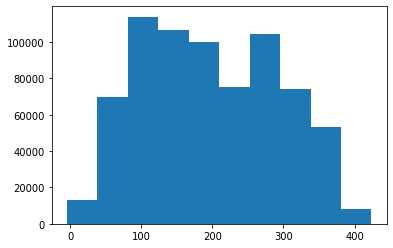

In [101]:
plt.hist(transformed[:,0])
plt.show()

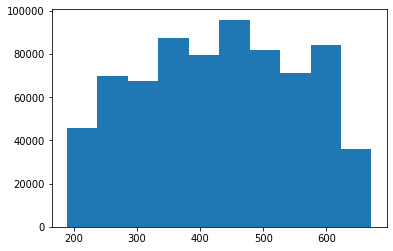

In [102]:
plt.hist(transformed[:,1])
plt.show()

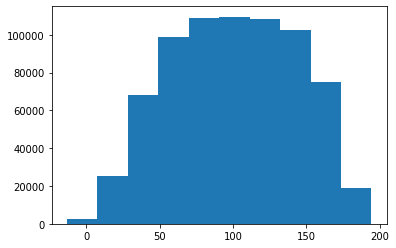

In [103]:
plt.hist(transformed[:,2])
plt.show()

In [104]:
np.shape(transformed)

(718110, 3)

In [105]:
t500 = transformed[transformed[:,0]>3300.9]
t500=t500[t500[:,0]<3699]

In [106]:
np.shape(t500)

(0, 3)

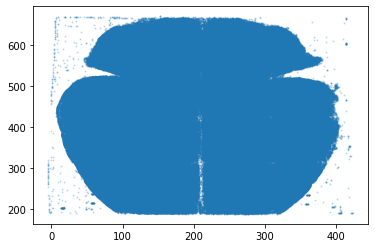

In [107]:
plt.scatter(transformed[:,0],transformed[:,1],s=1,alpha=0.2)
plt.show()

In [108]:
#edgevent x y z
#transformed z x y
floort = np.floor(transformed)

In [109]:
np.shape(floort)

(718110, 3)

In [110]:
masked_data = np.zeros(np.shape(annotation_volume))

In [111]:
floorto=floort
np.max(floorto[:,0])

423.0

In [112]:
floort=floort[floort[:,0]<454]
floort=floort[floort[:,1]<773]
floort=floort[floort[:,2]<301]
floort=floort[floort[:,0]>0]
floort=floort[floort[:,1]>0]
floort=floort[floort[:,2]>0]

In [113]:
# for each row in transformed, place the value in edgevent in the correct space
for i in np.arange(0,np.shape(floort)[0]-1):
    x,y,z=floort[i,:]
    z=z.astype(int)
    y=y.astype(int)
    x=x.astype(int)
    if annotation_volume[x,y,z]>0:
        masked_data[x,y,z] = annotation_volume[x,y,z]

In [114]:
tif.imsave("/home/emilyjanedennis/Desktop/z267masked_count_50wvent.tif",masked_data)

In [115]:
test=masked_data
np.shape(test)

(455, 774, 302)

In [116]:
test=test.reshape(455*774*302,1)
np.shape(test)

(106355340, 1)

In [117]:
testing = test[test>0]
maxtest = max(testing)
maxtest

1162.0

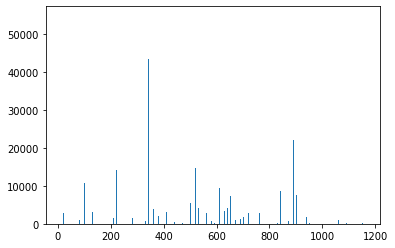

In [118]:
histinfo =plt.hist(testing,bins=maxtest.astype(int))
plt.show()

In [119]:
labels.insert(3,'histinfo',0)

In [120]:
labels

,atlas,ID,label,histinfo
0,SIGMA,1171,Ventricular System,0
1,Waxholm,171,Globus Pallidus,0
2,Waxholm,731,Striatum,0
3,Waxholm,221,Granule Cell Level of the Cerebellum,0
4,Waxholm,341,Molecular Layer of the Cerebellum,0
...,...,...,...,...
229,Waxholm,882,Commissure of the Superior Colliculus,0
230,Waxholm,902,Deeper Layers of the Superior Colliculus,0
231,Waxholm,1082,SP5,0
232,Waxholm,792,Anterior Commissure Intrabulbar part,0


In [121]:
for i in np.arange(1,maxtest.astype(int)):
    labels.histinfo[labels.ID==i]=histinfo[0][i]

/home/emilyjanedennis/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
labels

,atlas,ID,label,histinfo
0,SIGMA,1171,Ventricular System,0
1,Waxholm,171,Globus Pallidus,0
2,Waxholm,731,Striatum,0
3,Waxholm,221,Granule Cell Level of the Cerebellum,0
4,Waxholm,341,Molecular Layer of the Cerebellum,0
...,...,...,...,...
229,Waxholm,882,Commissure of the Superior Colliculus,0
230,Waxholm,902,Deeper Layers of the Superior Colliculus,0
231,Waxholm,1082,SP5,0
232,Waxholm,792,Anterior Commissure Intrabulbar part,0


In [123]:
histinfo

(array([ 309.,   93.,    0., ...,    0.,  710., 1354.]),
 array([  11.        ,   11.99053356,   12.98106713, ..., 1160.01893287,
        1161.00946644, 1162.        ]),
 <BarContainer object of 1162 artists>)

In [77]:
labels.to_csv('/home/emilyjanedennis/Desktop/z267_counts_sigma.csv')